Name :- Yajur Sethi.
student id:- C0863424.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



In [2]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.Series(data.target, name='target')
df = pd.concat([df, target], axis=1)



In [3]:
# Data preprocessing
# Explore and understand the features of the dataset
print(df.info())
print(df.describe())

# Handle missing values or outliers
# For simplicity, we'll fill missing values with the mean and handle outliers using Z-score
df.fillna(df.mean(), inplace=True)

# Identify and handle outliers using Z-score
z_scores = np.abs((df - df.mean()) / df.std())
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_no_outliers.drop('target', axis=1), df_no_outliers['target'], test_size=0.2, random_state=42)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [4]:
# Linear Regression
# Instantiate the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model's performance
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)



In [5]:
# Artificial Neural Network (ANN)
# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Design the ANN architecture
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1))

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions
ann_predictions = ann_model.predict(X_test_scaled).flatten()

# Evaluate the model's performance
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)






124/124 [==============================] - 0s 2ms/step


Linear Regression MSE: 0.47310162544208156, R2 Score: 0.6162271478185641
ANN MSE: 0.2756499184241143, R2 Score: 0.7763969732753472


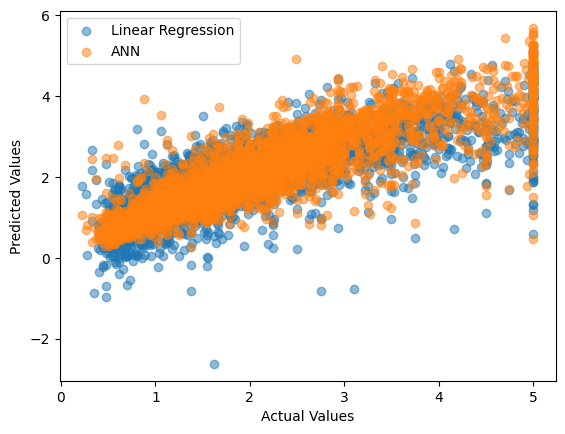

In [6]:
# Comparison and Analysis
print(f"Linear Regression MSE: {linear_mse}, R2 Score: {linear_r2}")
print(f"ANN MSE: {ann_mse}, R2 Score: {ann_r2}")

# Visualization (scatter plot)
plt.scatter(y_test, linear_predictions, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ann_predictions, label='ANN', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
